# ESCAPE school Regression

Set up an underlying ground truth to generate data:

cos(x) = 1 - x^2/2! + x^4/4! + ...

In [1]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

import numpy as np
X_finegrid = np.linspace(0, 1, 100)

np.random.seed(0)

In [2]:
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_test = np.sort(np.random.rand(n_samples))
y_test = true_fun(X_test) + np.random.randn(n_samples) * 0.1

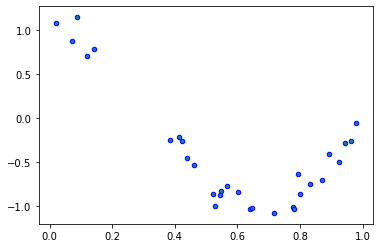

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, y, edgecolor='b', s=20)

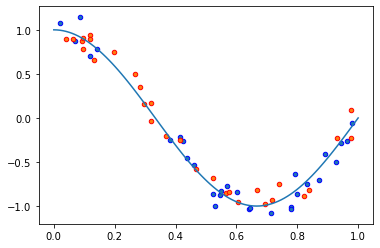

In [4]:
plt.scatter(X, y, edgecolor='b', s=20)
plt.scatter(X_test, y_test, edgecolor='r', s=20)
plt.plot(X_finegrid, true_fun(X_finegrid))

0.3975604720832877

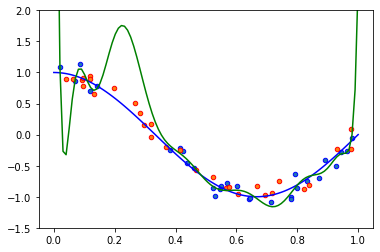

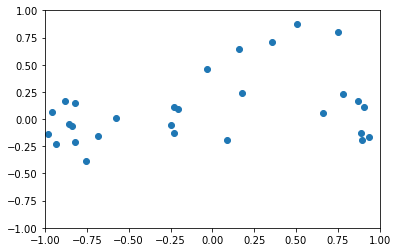

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

linear_regression = LinearRegression()

polynomial_features = PolynomialFeatures(degree=14, include_bias=False)

model = Pipeline([("polynomial_features", polynomial_features),
                    ("linear_regression", linear_regression)])

model.fit(X[:, np.newaxis], y)

y_pred = model.predict(X_test[:, np.newaxis])

plt.scatter(X, y, edgecolor='b', s=20)
plt.scatter(X_test, y_test, edgecolor='r', s=20)
plt.plot(X_finegrid, true_fun(X_finegrid), color ='b')
plt.plot(X_finegrid, model.predict(X_finegrid[:, np.newaxis]), color = 'g')
plt.ylim(-1.5, 2)

plt.figure()
plt.scatter(y_test, y_pred - y_test)
plt.xlim((-1, 1))
plt.ylim((-1, 1))

sqrt(mean_squared_error(y_test, y_pred))


0.45385771992314466
0.23099606268105893
0.12392630646504559
0.11323806651079447
0.11592754228728916
0.11165736911956387
0.11938930511118886
0.11909135599836587
0.13541149453515425
0.1328294771402734
0.16439875919770042
0.20319088968933333
0.3809980497404426
0.3975604720832877


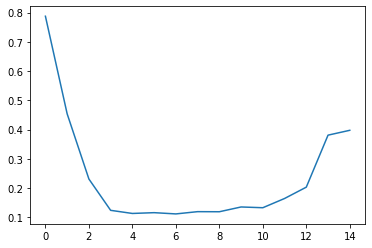

In [7]:
from numpy import repeat, mean

degrees = range(1,15)
RMSE = [None] * 16

RMSE[0] = sqrt (mean_squared_error(y_test, 
                                   repeat(mean(y), len(y_test))))

for degree in degrees:
    linear_regression = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    model = Pipeline([("polynomial_features", polynomial_features),
                    ("linear_regression", linear_regression)])

    model.fit(X[:, np.newaxis], y)
    y_pred = model.predict(X_test[:, np.newaxis])
    
    RMSE[degree] = sqrt(mean_squared_error(y_test, y_pred))
    
    print(RMSE[degree])


plt.plot(RMSE)
    